<a href="https://colab.research.google.com/github/Muriloviskexe/Python/blob/main/Arvore_de_decis%C3%B5es_Analise_de_sentimentos_(filmes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

column_names = ['review', 'sentimento']

analises = pd.read_csv('/content/IMDB Dataset.csv.csv', header=None, names=column_names)
analises.dropna()
print (analises.describe())
print (analises)

                                                   review sentimento
count                                               50001      50001
unique                                              49583          3
top     Loved today's show!!! It was a variety and not...   positive
freq                                                    5      25000
                                                  review sentimento
0                                                 review  sentiment
1      One of the other reviewers has mentioned that ...   positive
2      A wonderful little production. <br /><br />The...   positive
3      I thought this was a wonderful way to spend ti...   positive
4      Basically there's a family where a little boy ...   negative
...                                                  ...        ...
49996  I thought this movie did a down right good job...   positive
49997  Bad plot, bad dialogue, bad acting, idiotic di...   negative
49998  I am a Catholic taught in parochial 

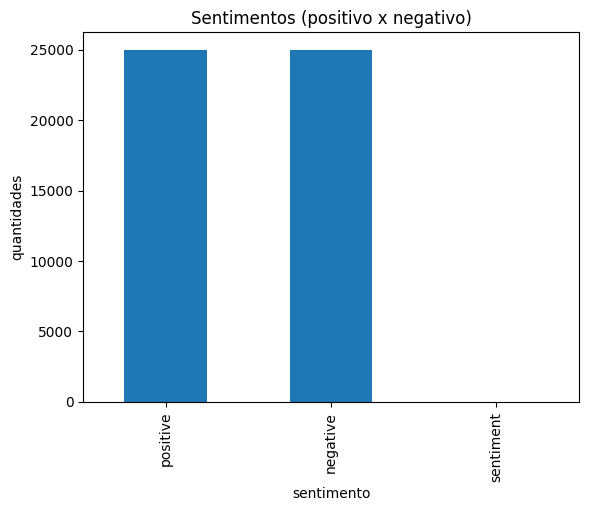

In [ ]:
analises['sentimento'].value_counts().plot(kind='bar', title="Sentimentos (positivo x negativo)", xlabel = 'sentimento', ylabel='quantidades')
plt.show()

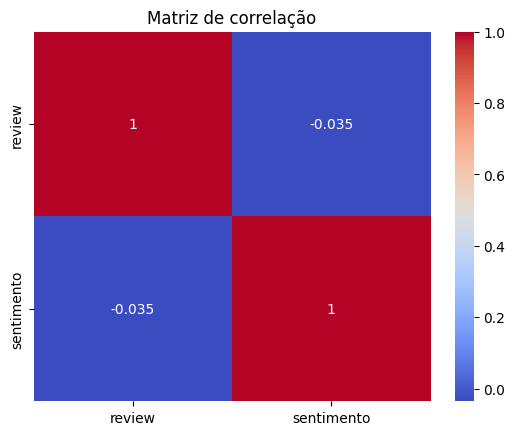

In [ ]:
le = LabelEncoder()
for column in analises.columns:
  analises[column] = le.fit_transform(analises[column])

correlacao = analises.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

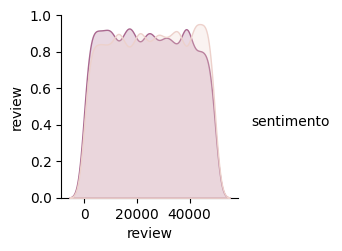

In [ ]:
sns.pairplot(analises, hue='sentimento')

In [ ]:
X = analises.drop('sentimento', axis=1)
y = analises['sentimento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
testes = DecisionTreeClassifier()
testes = testes.fit(X_train, y_train)
y_pred = testes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 57.32%


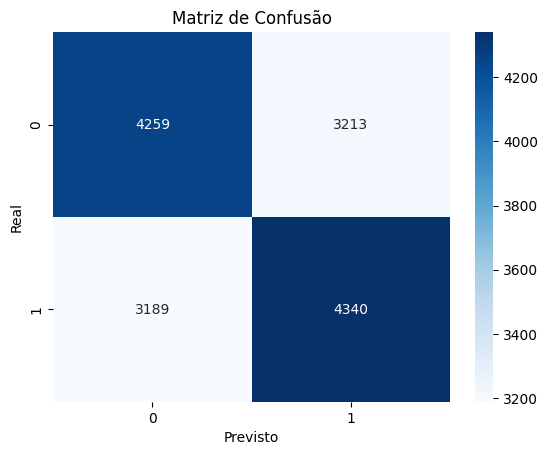

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()